In [119]:
from dora import DataExplorer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import psycopg2
explorer = DataExplorer()

Unable to connect!
{0}


AttributeError: 'NoneType' object has no attribute 'format'

In [3]:
algorithm=KMeans(n_clusters=5)
algorithm.fit(X)
y_pred=algorithm.labels_

In [22]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

colors = ['green','red','blue']

X, y = noisy_moons
X = StandardScaler().fit_transform(X)

In [25]:
algorithm = KMeans(n_clusters = 2)
algorithm.fit(X)

y_pred = algorithm.labels_.astype(np.int)

In [26]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [36]:
a=KMeans(n_clusters=3)
a.fit_predict(X)

array([0, 0, 1, ..., 0, 0, 1], dtype=int32)

In [37]:
a.cluster_centers_

array([[ 0.36795449, -1.1967287 ],
       [-0.81258012,  0.81682257],
       [ 1.12912986, -0.11700526]])

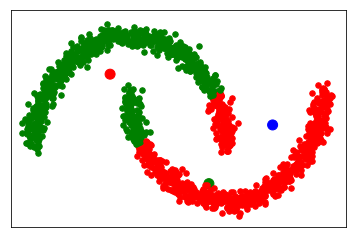

In [38]:
centers = a.cluster_centers_
center_colors = colors[:len(centers)]
plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], s=30, c=colors[y_pred[i]])

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xticks(())
plt.yticks(())    
plt.show()

In [116]:
conn = psycopg2.connect("dbname='DSE203' user='postgres' host='localhost' password='Hb1FwL2'")
cur = conn.cursor()

In [120]:
cur.execute("""select orderlines.productid,
                products.asin,
                count(*) as num_orders,
                avg(regexp_replace(orderlines.totalprice :: TEXT, '[$,]', '', 'g') :: NUMERIC) as totalprice_avg,
                r.overall,
                products.category,
                DATE_PART('day', max(shipdate)::TIMESTAMP - min(shipdate)::TIMESTAMP) as days_on_sale,
                case 
        			when calendar.month=3 and calendar.dom>=21 then 1
            		when calendar.month=4 then 1
            		when calendar.month=5 then 1
            		when calendar.month=6 and calendar.dom<21 then 1
            		when calendar.month=6 and calendar.dom>=21 then 2
            		when calendar.month=7 then 2
            		when calendar.month=8 then 2
            		when calendar.month=9 and calendar.dom<23 then 2
            		when calendar.month=9 and calendar.dom>=23 then 3
            		when calendar.month=10 then 3
            		when calendar.month=11 then 3
            		when calendar.month=12 and calendar.dom<21 then 3
            		when calendar.month=12 and calendar.dom>=21 then 4
            		when calendar.month=1 then 4
            		when calendar.month=2 then 4
            		when calendar.month=3 and calendar.dom<21 then 4
            		else 0
        		end as season

FROM orderlines
            JOIN products
              ON orderlines.productid = products.productid
            JOIN orders o
              ON orderlines.orderid = o.orderid
            JOIN reviews r 
              ON products.asin=r.asin
            JOIN calendar  
              ON o.orderdate=calendar.date
            WHERE orderlines.numunits > 0
group by orderlines.productid, products.asin, r.overall, products.category,days_on_sale, season""")
rows = cur.fetchall()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 95))



ProgrammingError: aggregate functions are not allowed in GROUP BY
LINE 7:                 DATE_PART('day', max(shipdate)::TIMESTAMP - ...
                                         ^


In [11]:
output = pd.DataFrame(rows,columns=['productid','asin','numOrders','totalavgprice','rating','categoryid','season'])

In [100]:
output.head()

,productid,asin,numOrders,totalavgprice,rating,categoryid,season
0,10001,0000000116,91,15.5818681318681319,1.00,1,1
1,10001,0000000116,46,14.3543478260869565,1.00,1,2
2,10001,0000000116,43,18.7186046511627907,1.00,1,3
3,10001,0000000116,76,15.1559210526315789,1.00,1,4
4,10001,0000000116,91,15.5818681318681319,4.00,1,1


In [101]:
test=output[['numOrders','rating','totalavgprice','categoryid']].values

In [102]:
test

array([[91, Decimal('1.00'), Decimal('15.5818681318681319'), '1'],
       [46, Decimal('1.00'), Decimal('14.3543478260869565'), '1'],
       [43, Decimal('1.00'), Decimal('18.7186046511627907'), '1'],
       ..., 
       [36, Decimal('3.00'), Decimal('19.4444444444444444'), '4468'],
       [72, Decimal('4.00'), Decimal('19.4444444444444444'), '4468'],
       [216, Decimal('5.00'), Decimal('19.4444444444444444'), '4468']], dtype=object)

In [103]:
algorithm=KMeans(n_clusters=4, algorithm='full')
algorithm.fit_predict(test)
y_pred=algorithm.labels_

In [104]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [105]:
colors = ['green','red','blue','purple']

In [106]:
test[1][1]

Decimal('1.00')

In [107]:
centers = algorithm.cluster_centers_
center_colors = colors[:len(centers)]
plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)

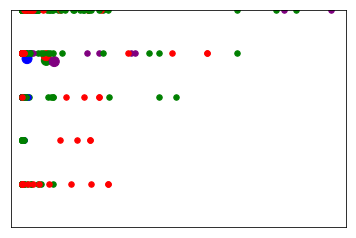

In [108]:
for i in range(600):
    plt.scatter(test[i][0], test[i][1], s=30, c=colors[y_pred[i]])

plt.xlim(-50, 1500)
plt.ylim(0, 5)
plt.xticks(())
plt.yticks(())    
plt.show()

In [ ]:
input_centers=df.loc[output['asin'].isin('')]

In [ ]:
data=